## TEAM 2

#### TEAM MEMBERS
##### Pranit Dutta 20010681
##### Sushil Rajeeva Bhandry 20015528
##### Sabitha Rachel Nazareth 20012150
##### Nihal Sanjay Palled 20011136

## Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#convert the datatype of column TotalCharges to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Drop the null values 
data.dropna(inplace=True)

# EDA

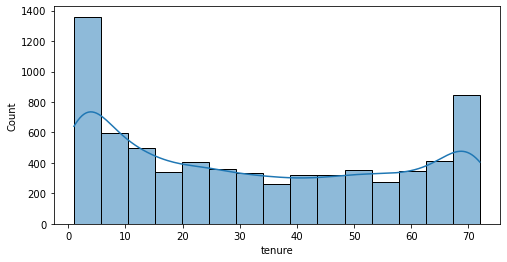

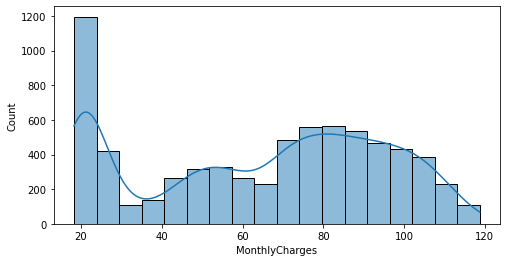

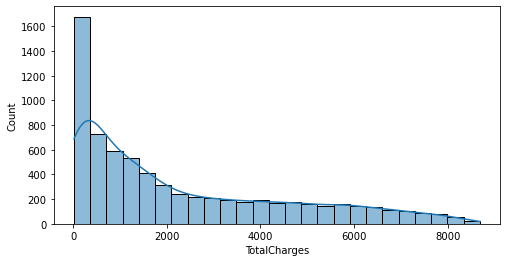

In [11]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data, x=column, kde=True)
    plt.show()

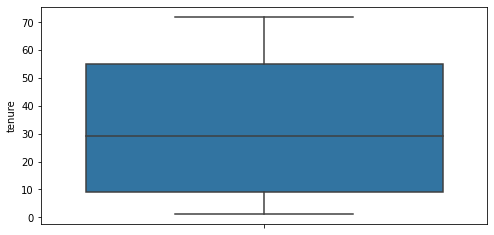

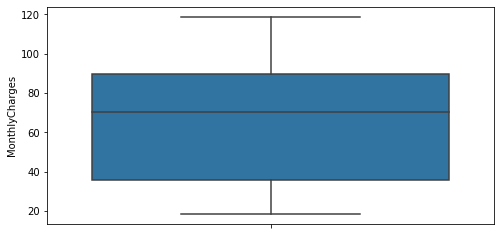

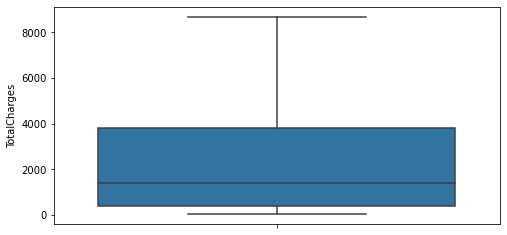

In [12]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=data, y=column)
    plt.show()

###### Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.
###### Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).
###### TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [13]:
data['tenure'].dtypes

dtype('int64')

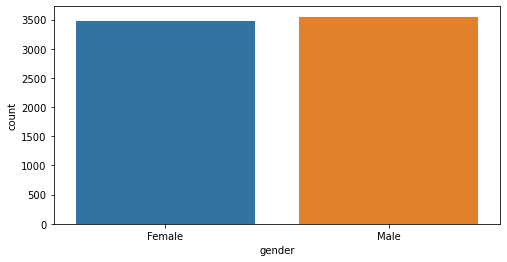

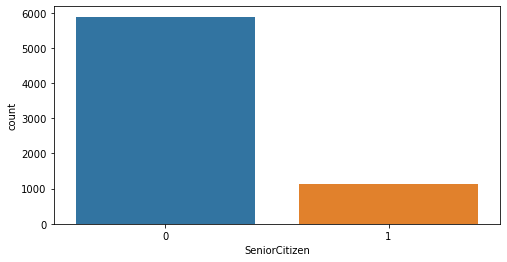

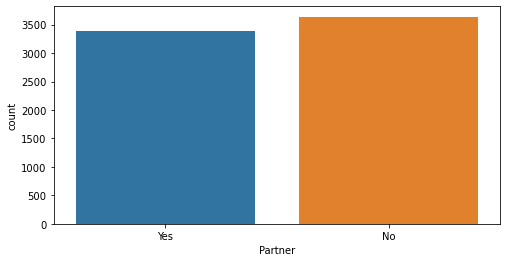

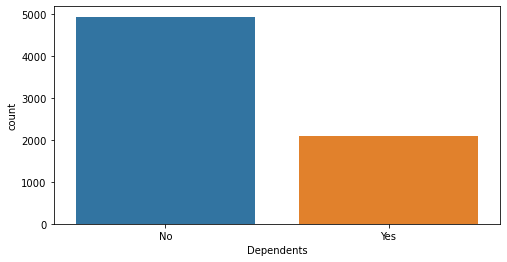

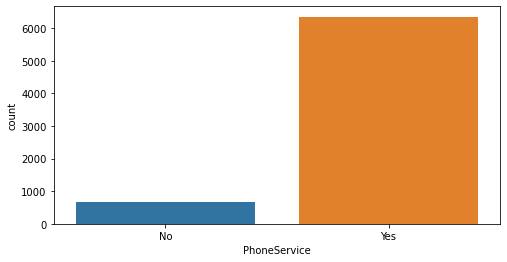

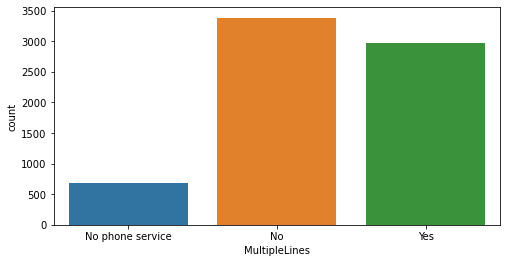

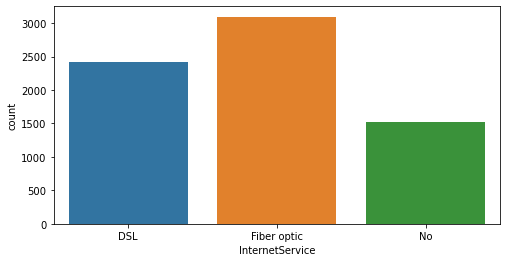

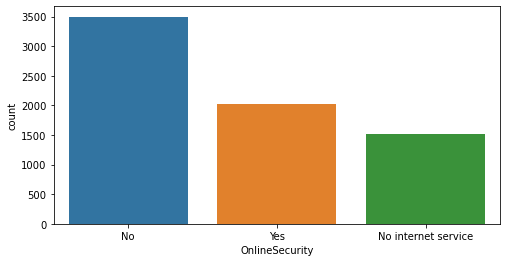

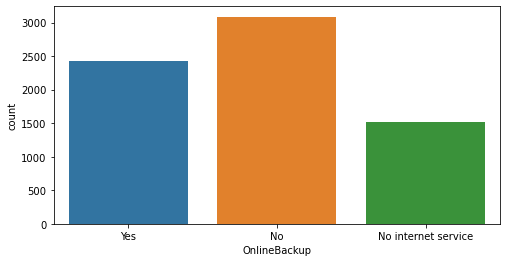

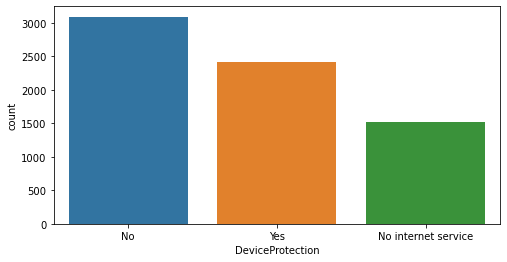

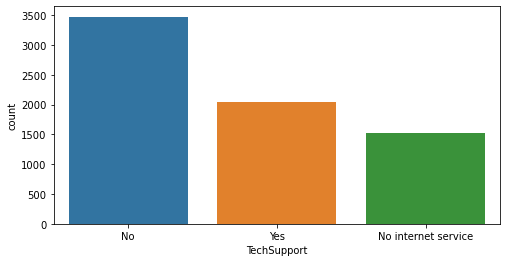

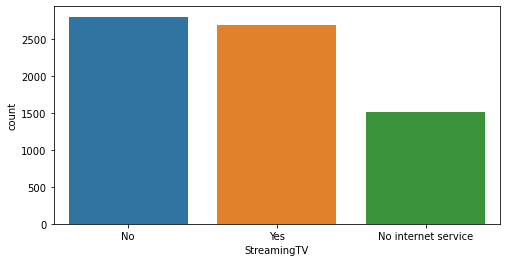

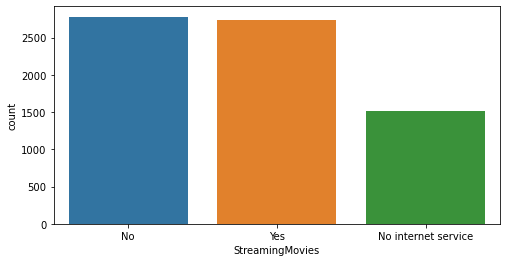

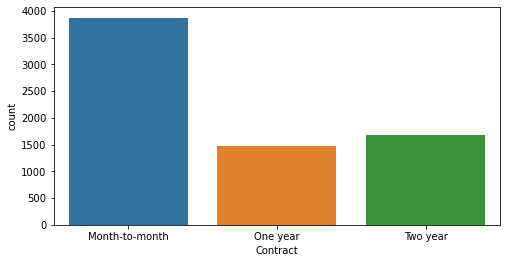

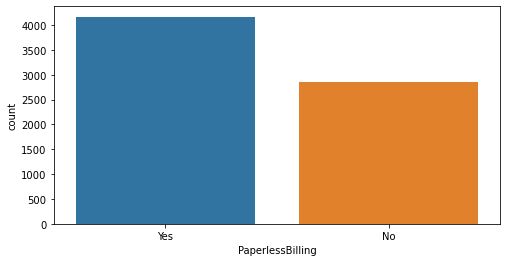

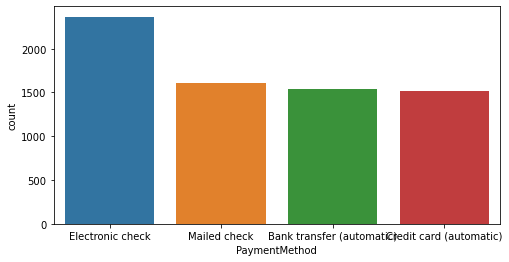

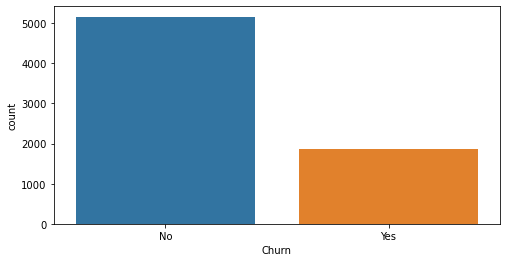

In [14]:
for column in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'Churn']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=column)
    plt.show()

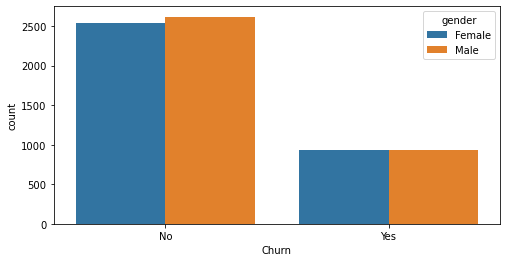

In [15]:
# Check the churn rate by gender
plt.figure(figsize=(8,4))
sns.countplot(data=data, x="Churn", hue="gender")
plt.show()

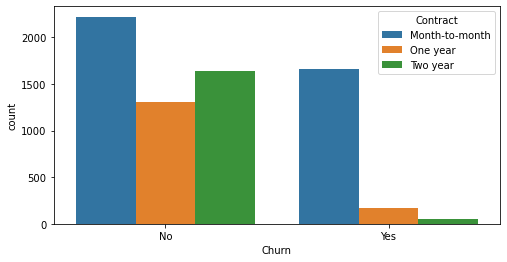

In [16]:
# Check the churn rate by contract type
plt.figure(figsize=(8,4))
sns.countplot(data=data, x="Churn", hue="Contract")
plt.show()

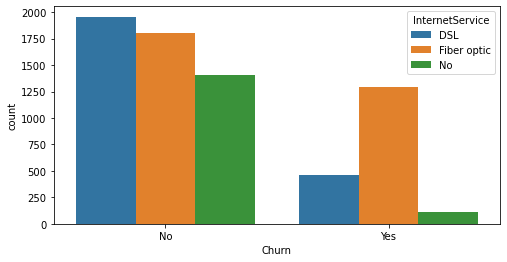

In [17]:
# Check the churn rate by internet service type
plt.figure(figsize=(8,4))
sns.countplot(data=data, x="Churn", hue="InternetService")
plt.show()

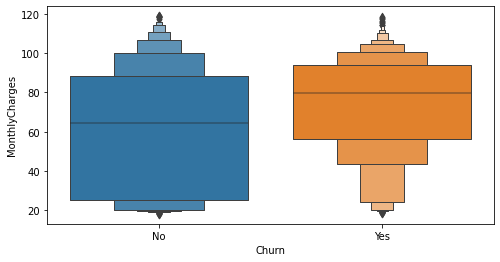

In [18]:
# Check the churn rate by monthly charges
plt.figure(figsize=(8,4))
sns.boxenplot(data=data, x="Churn", y="MonthlyCharges")
plt.show()

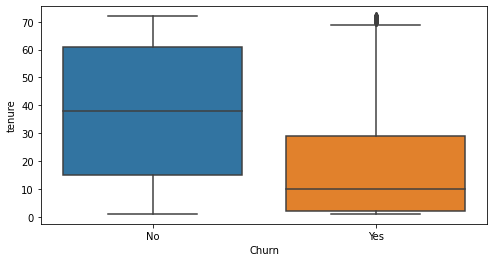

In [19]:
# Check the churn rate by tenure
plt.figure(figsize=(8,4))
sns.boxplot(data=data, x="Churn", y="tenure")
plt.show()

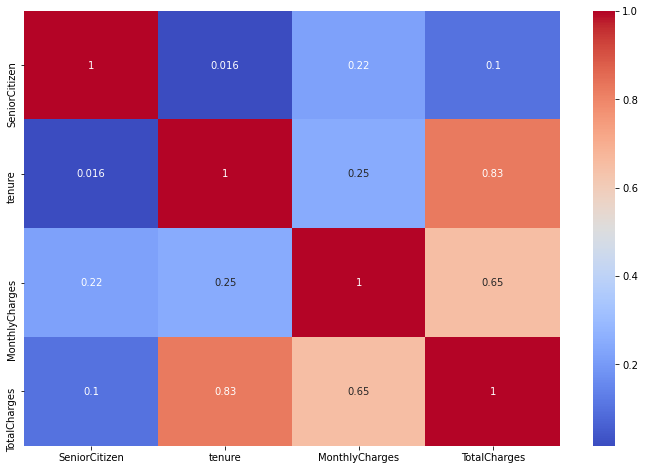

In [20]:
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# EDA SUMMARY

#### Order / Values of features for customer churn cases :
#### Categorical Features (Order) :
#### gender : Male = Female
#### SeniorCitizen : No SeniorCitizen > SeniorCitizen
#### Partner : No Partner > Partner
#### Dependents : No Dependent > Dependent
#### PhoneService : PhoneService > No PhoneService
#### MultipleLines : MultipleLines > No MultipleLines > No PhoneService
#### InternetService : Fiber Optic > DSL > No InternetService
#### OnlineSecurity : Absent > Present > No InternetService
#### OnlineBackup : Absent > Present > No InternetService
#### DeviceProtection : Absent > Present > No InternetService
#### TechSupport : Absent > Present > No InternetService
#### StreamingTV : Absent > Present > No InternetService
#### StreamingMovies : Absent > Present > No InternetService
#### Contract : Month-to-Month > One year > Two year
#### PaperlessBilling : Present > Absent
#### PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!
#### Numerical Features (Range) :
#### tenure : 1 - 5 months
#### MonthlyCharges : 65 - 105
#### TotalCharges : 0 - 1000
#### According to the EDA, these order / range of values results in customer churn!

## Data Preprocessing 

In [21]:
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


In [22]:
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


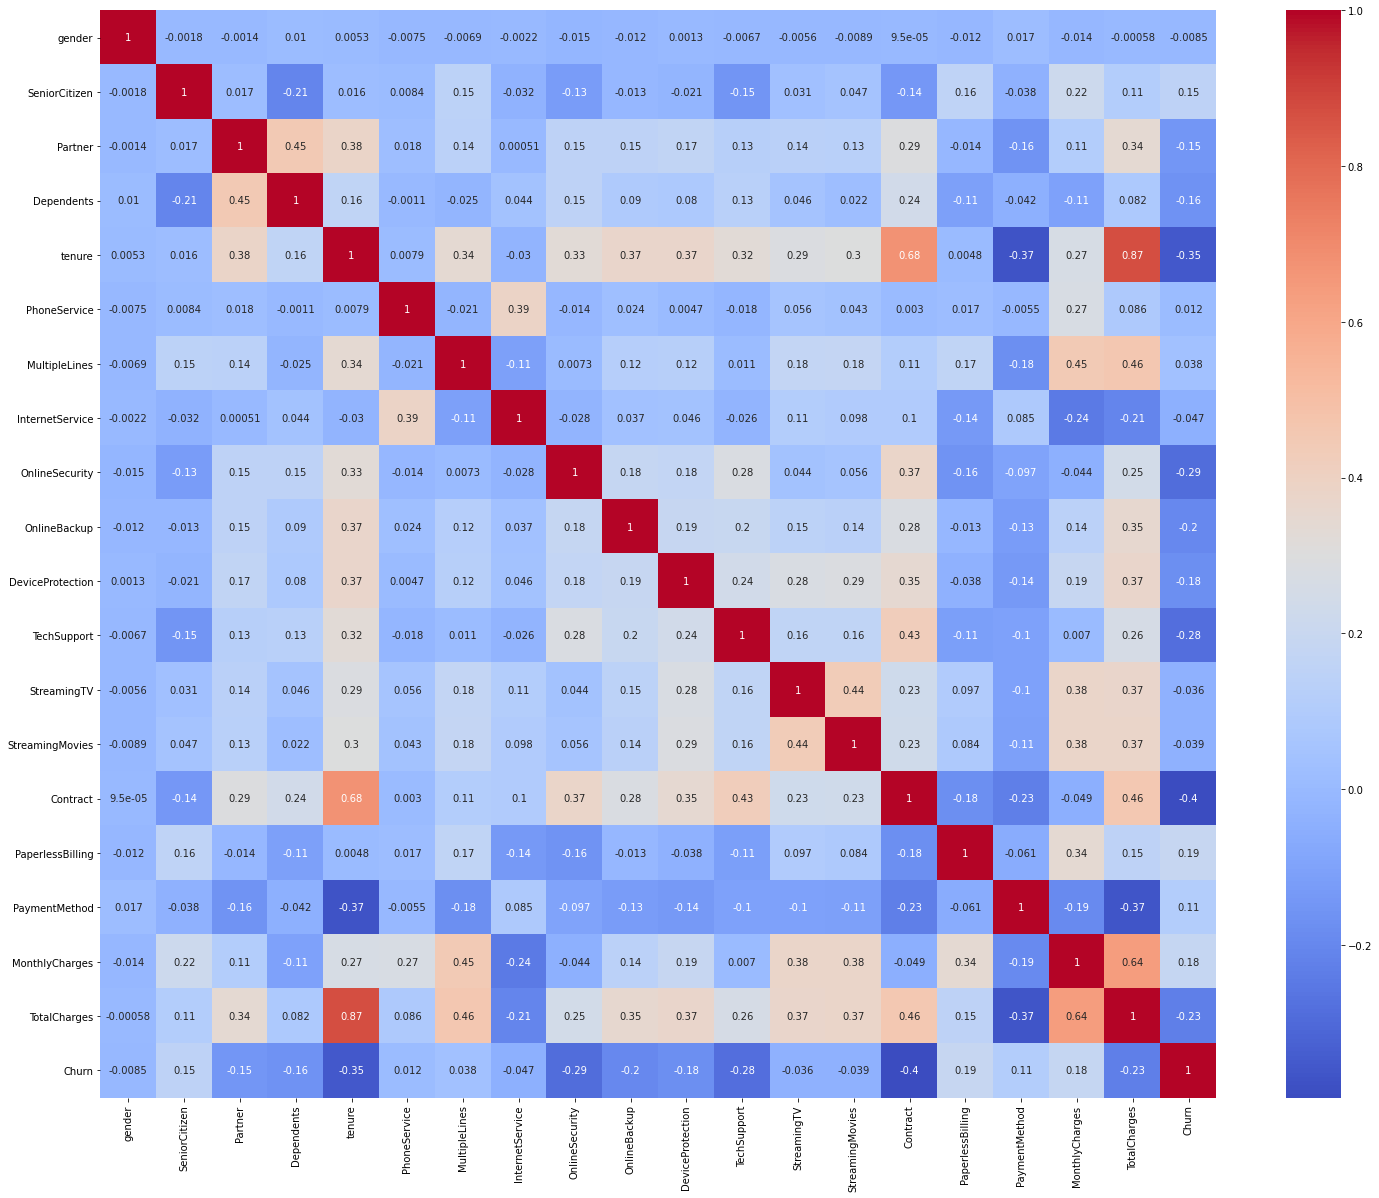

In [23]:
corr_matrix = data.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(['Churn'], axis = 1)
y = data['Churn']

# SAMPLING

In [25]:
churn_counts = data['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

print("The ratio between retained customers and churners is",churn_ratio)

The ratio between retained customers and churners is 2.7624398073836276


###### The ratio between retained customers and churners is 2.7624398073836276
###### Since our minority class (churn 1) is 2.76 times smaller than majority class (churn 0) we should consider oversampling 
###### the minority class. This problem is called imbalance dataset. This could be done using SMOTE-ENN technique (Synthetic 
###### Minority Over-sampling Technique combined with Edited Nearest Neighbors).

###### This hybrid sampling technique combines both over-sampling and under-sampling techniques to address the class imbalance 
###### problem in binary classification tasks. The SMOTE-ENN technique generates synthetic examples for the minority class and 
###### remove noisy examples from the majority class. The SMOTE technique is applied first to over-sample the minority class and 
###### generate synthetic examples. Then, the ENN technique is applied to remove noisy examples from the majority class. This 
###### results in a balanced dataset with reduced noise and increased number of minority class examples.

###### The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
###### Due to this, predictions will be biased towards Not-Churn customers.
###### Visualizations will also display this bias!

In [26]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X, y = sm.fit_resample(X,y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

# FEATURE SCALING

In [28]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

# MODEL BUILDING

In [29]:
# Evaluate the model 
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()
models=["LDA","XGboost","SVM","ADA BOOST","Neural Network","Neural Network with grid search","Label prop","Naive baise","KNN","Random Forest","Decision Tree","Logistic Regression","Bagging Classifier"] 
ac=[]
FF1=[]
rec=[]
pres=[]
def evaluate_model(X_test, y_test, model, title):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced = balanced_accuracy_score(y_test, y_pred)
    ac.append(accuracy)
    FF1.append(f1)
    rec.append(recall)
    pres.append(precision)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    plot_confusion_matrix(y_test,y_pred, title)
    
    
    return [accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa]

## 1. Linear Discriminant Analysis 

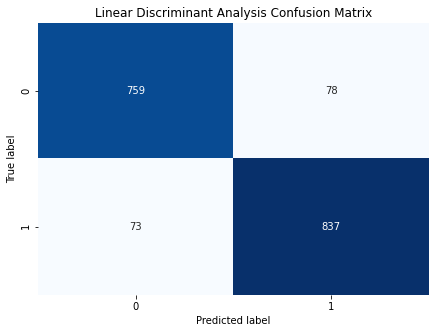

Accuracy:  0.9135661133371494
Precision:  0.9147540983606557
Recall:  0.9197802197802197
F1:  0.9172602739726027
Balanced Accuracy:  0.9132951278112569
ROC AUC score:  0.9132951278112568
Cohens Kappa:  0.8267883583118567


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score, cohen_kappa_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, lda, "Linear Discriminant Analysis Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 2. XG Boost

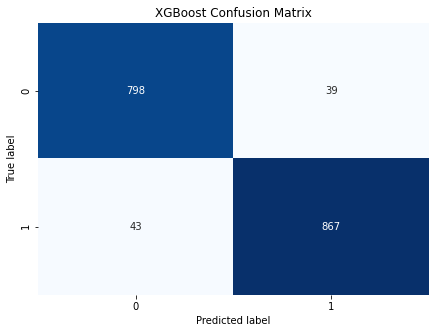

Accuracy:  0.953062392673154
Precision:  0.956953642384106
Recall:  0.9527472527472527
F1:  0.9548458149779735
Balanced Accuracy:  0.9530761353341999
ROC AUC score:  0.9530761353341999
Cohens Kappa:  0.9059786090079495


In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, xgb, "XGBoost Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 3. Support Vector Machines 

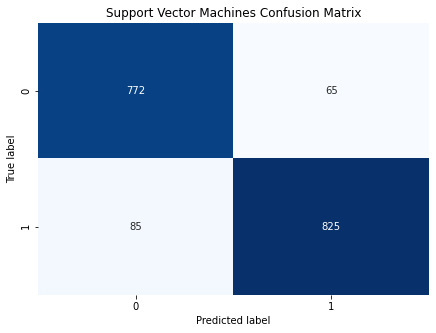

Accuracy:  0.9141385231825987
Precision:  0.9269662921348315
Recall:  0.9065934065934066
F1:  0.9166666666666666
Balanced Accuracy:  0.9144675515643257
ROC AUC score:  0.9144675515643257
Cohens Kappa:  0.8281413955928647


In [32]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 197)
svm.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, svm, "Support Vector Machines Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 4. AdaBoost Classifier

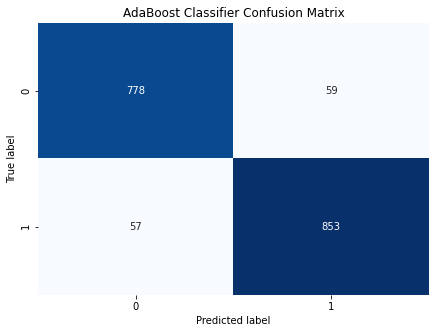

Accuracy:  0.9336004579278764
Precision:  0.9353070175438597
Recall:  0.9373626373626374
F1:  0.9363336992316136
Balanced Accuracy:  0.9334363963396222
ROC AUC score:  0.9334363963396222
Cohens Kappa:  0.8669558834921881


In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, ada, "AdaBoost Classifier Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 5. Neural Networks

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


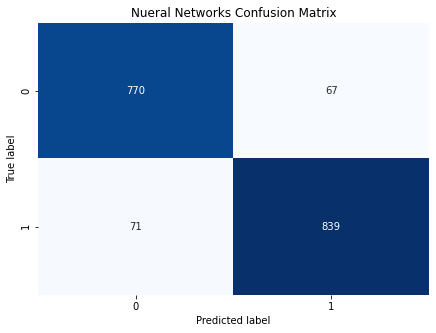

Accuracy:  0.9210074413279908
Precision:  0.9260485651214128
Recall:  0.921978021978022
F1:  0.9240088105726872
Balanced Accuracy:  0.9209651161264065
ROC AUC score:  0.9209651161264064
Cohens Kappa:  0.8417688785743539


In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam')
mlp.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, mlp, "Nueral Networks Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## Neural Network with Grid Search

{'activation': 'tanh', 'solver': 'lbfgs'}


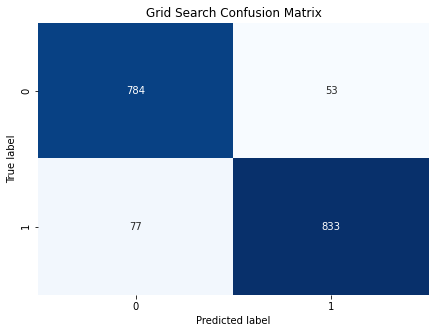

Accuracy:  0.9255867200915856
Precision:  0.9401805869074492
Recall:  0.9153846153846154
F1:  0.9276169265033407
Balanced Accuracy:  0.9260316147412921
ROC AUC score:  0.9260316147412921
Cohens Kappa:  0.8510843935972388


In [35]:
from sklearn.exceptions import ConvergenceWarning
import warnings

params = {'solver':('lbfgs','sgd','adam'),'activation': ['identity', 'logistic', 'tanh', 'relu']}

model_grid = GridSearchCV(mlp, param_grid = params, scoring = 'accuracy', cv=3)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    model_grid = model_grid.fit(X_train, y_train)


print(model_grid.best_params_)
accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, model_grid, "Grid Search Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 7. Label Propagation 

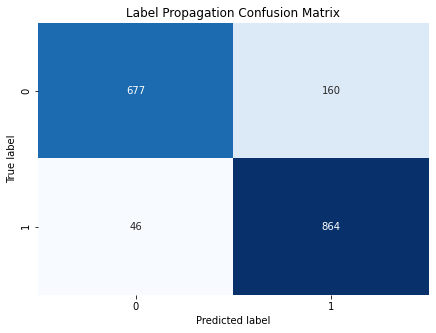

Accuracy:  0.8820835718374356
Precision:  0.84375
Recall:  0.9494505494505494
F1:  0.8934850051706308
Balanced Accuracy:  0.8791458243071146
ROC AUC score:  0.8791458243071146
Cohens Kappa:  0.7624569477062318


In [36]:
from sklearn.semi_supervised import LabelPropagation

lp = LabelPropagation(kernel='knn', n_neighbors=50, max_iter=10000, tol=0.00001)
lp.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, lp, "Label Propagation Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 8. Naive Bayes 



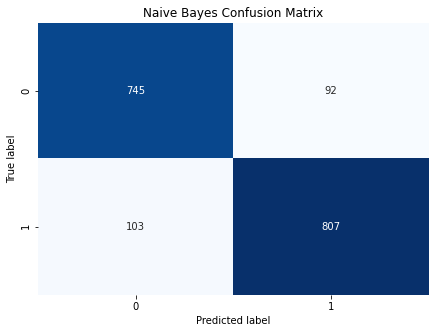

Accuracy:  0.8883800801373783
Precision:  0.8976640711902113
Recall:  0.8868131868131868
F1:  0.8922056384742951
Balanced Accuracy:  0.8884484094161513
ROC AUC score:  0.8884484094161513
Cohens Kappa:  0.7764875080619076


In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, nb, "Naive Bayes Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 9.	K-Nearest Neighbor 


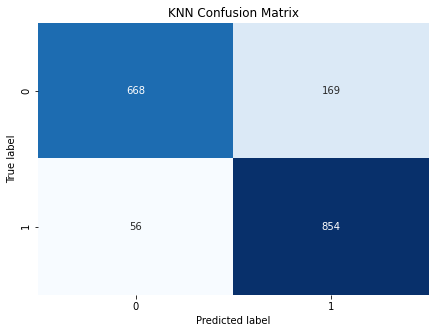

Accuracy:  0.8712077847738982
Precision:  0.8347996089931574
Recall:  0.9384615384615385
F1:  0.8836006207966891
Balanced Accuracy:  0.8682749747265877
ROC AUC score:  0.8682749747265877
Cohens Kappa:  0.7405601379719107


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 150)
knn.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, knn, "KNN Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 10.	Random Forest 

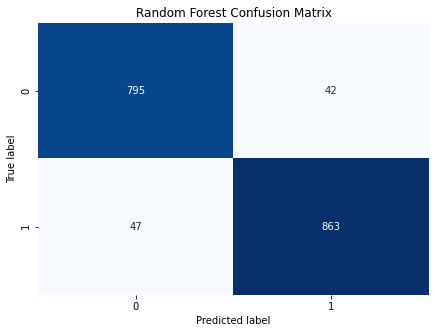

Accuracy:  0.9490555237550086
Precision:  0.9535911602209944
Recall:  0.9483516483516483
F1:  0.9509641873278236
Balanced Accuracy:  0.9490862184410571
ROC AUC score:  0.9490862184410571
Cohens Kappa:  0.8979572817572955
             feature  importance
0             gender    0.008641
1      SeniorCitizen    0.005430
2            Partner    0.035204
3         Dependents    0.022030
4             tenure    0.185045
5       PhoneService    0.003116
6      MultipleLines    0.009414
7    InternetService    0.044332
8     OnlineSecurity    0.102081
9       OnlineBackup    0.043198
10  DeviceProtection    0.023195
11       TechSupport    0.083389
12       StreamingTV    0.012374
13   StreamingMovies    0.010993
14          Contract    0.178998
15  PaperlessBilling    0.007005
16     PaymentMethod    0.020144
17    MonthlyCharges    0.103599
18      TotalCharges    0.101810


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, rf, "Random Forest Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

imp = rf.feature_importances_
feature_names = X.columns
feature_imp = pd.DataFrame({'feature': feature_names, 'importance': imp})
print(feature_imp)

## 11.	Decision Trees 

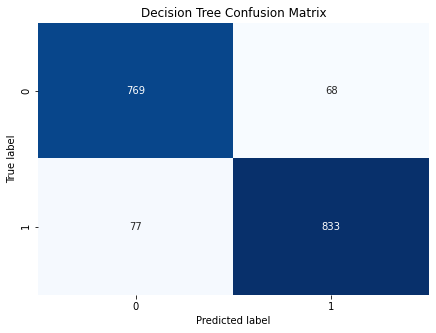

Accuracy:  0.9170005724098454
Precision:  0.9245283018867925
Recall:  0.9153846153846154
F1:  0.9199337382661513
Balanced Accuracy:  0.9170710412645897
ROC AUC score:  0.9170710412645896
Cohens Kappa:  0.8337824811991099


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 142)
dt.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, dt, "Decision Tree Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 12.	K-means Clustering 

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(X)

# Print the cluster centers and labels
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[4.42339374e-01 1.61449753e-01 5.58072488e-01 2.71828666e-01
  4.91729819e+01 9.15156507e-01 1.34308072e+00 7.15403624e-01
  9.30395387e-01 1.09225700e+00 1.09184514e+00 9.16392092e-01
  1.18904448e+00 1.18533773e+00 9.32454695e-01 6.42092257e-01
  1.18698517e+00 9.18928748e+02 4.70255848e+03]
 [3.92572944e-01 9.90274094e-02 2.31653404e-01 1.81844975e-01
  1.13097554e+01 9.05098733e-01 5.55260831e-01 1.05246095e+00
  4.16740348e-01 4.88358385e-01 5.16651930e-01 4.38255231e-01
  7.16769820e-01 7.06749190e-01 3.24196876e-01 5.38756263e-01
  1.80607132e+00 5.44427056e+02 1.28876216e+03]]
[0 0 1 ... 1 0 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 13.	Logistic Regression 


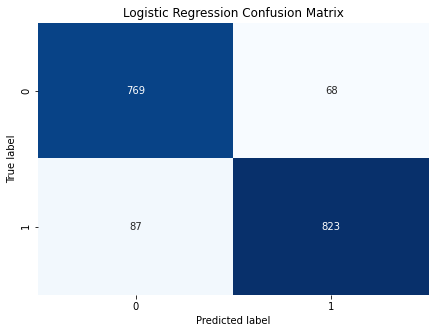

Accuracy:  0.911276473955352
Precision:  0.9236812570145904
Recall:  0.9043956043956044
F1:  0.9139367018323155
Balanced Accuracy:  0.9115765357700842
ROC AUC score:  0.9115765357700841
Cohens Kappa:  0.822404273027237


In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, lr, "Logistic Regression Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## 14.	Bagging Classifier 

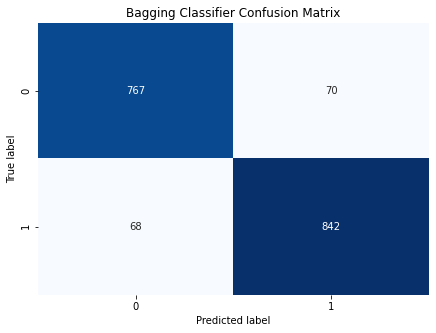

Accuracy:  0.9210074413279908
Precision:  0.9232456140350878
Recall:  0.9252747252747253
F1:  0.924259055982437
Balanced Accuracy:  0.9208213530794176
ROC AUC score:  0.9208213530794175
Cohens Kappa:  0.8417233786372583


In [43]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier()
bg = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=True, random_state=1)
bg.fit(X_train, y_train)

accuracy, cm, precision, recall, f1, balanced, roc_auc, kappa = evaluate_model(X_test, y_test, bg, "Bagging Classifier Confusion Matrix")
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)
print('Balanced Accuracy: ',balanced)
print('ROC AUC score: ',roc_auc)
print('Cohens Kappa: ',kappa)

## Performance Analysis of different models

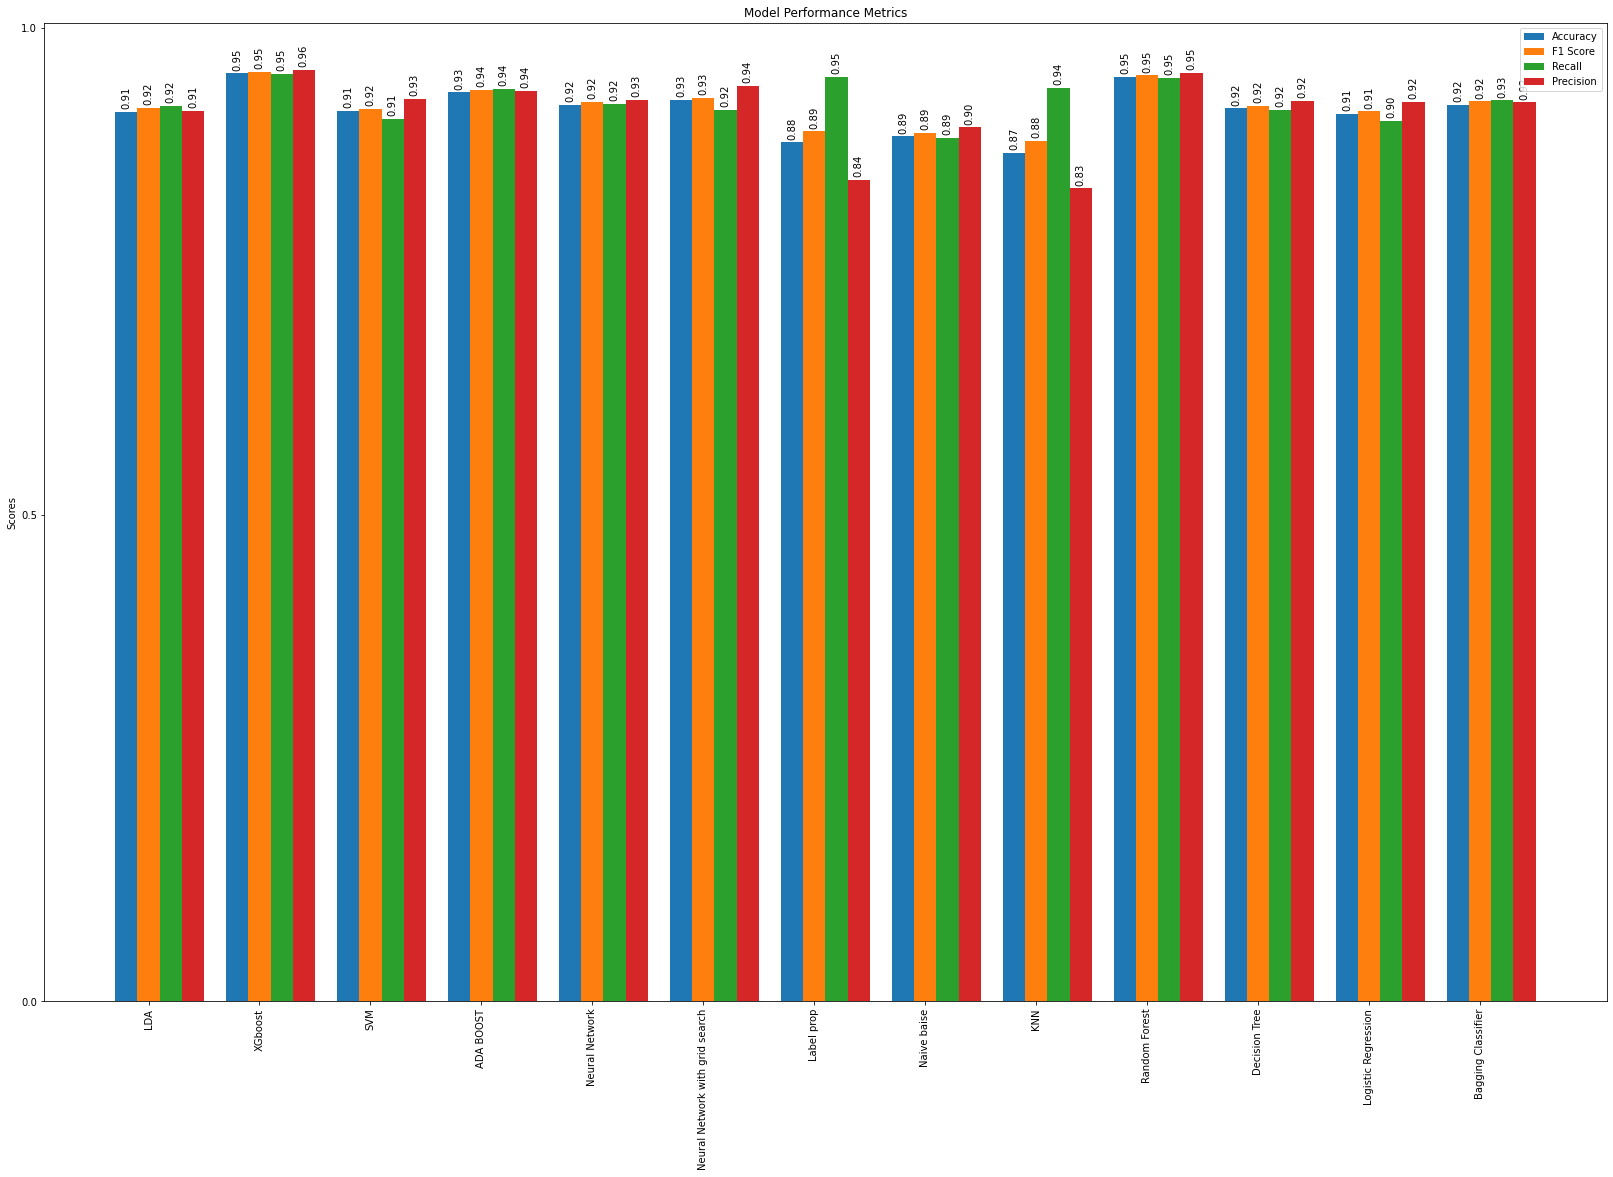

In [44]:
fig, ax = plt.subplots(figsize=(28, 18))
x = np.arange(len(models))

width =0.2
def display_values_on_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)

# Plot the bars
bars1 = ax.bar(x - width, ac, width, label='Accuracy')
bars2 = ax.bar(x, FF1, width, label='F1 Score')
bars3 = ax.bar(x + width, rec, width, label='Recall')
bars4 = ax.bar(x + 2 * width, pres, width, label='Precision')

# Display values on top of the bars
display_values_on_bars(ax, bars1)
display_values_on_bars(ax, bars2)
display_values_on_bars(ax, bars3)
display_values_on_bars(ax, bars4)

# Set up axis labels and ticks
ax.set_ylabel('Scores')
yticks_interval = 0.5
yticks = np.arange(0, 1.1, yticks_interval)
ax.set_yticks(yticks)
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.legend()

plt.show()